# Movie reviews

This notebook takes you though a complete iteration of Machine Learning Assignment 1 - Movie reviews. The assignment details (including links to download the data) can be found [here](https://docs.google.com/document/d/1WGYw99e5q6j5V0Zrf2HveagU6URt_kVvdR8B9HYQ99E/edit?usp=sharing). 

In [1]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [2]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

# Function for feature building and extraction on natural language data

In [3]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 18, alternate_sign=False, stop_words='english')
        X_hv = hv.fit_transform(movie_data.review)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

In [4]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='moviereviews_train.tsv', my_random_seed=21)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of HashingVectorizer X:
(25000, 262144)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9


# Fit (and tune) Various Models

### MODEL: ordinary least squares

In [5]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print(ols_performance_train.performance_measures)

{'Pos': 9999, 'Neg': 10001, 'TP': 4608, 'TN': 5321, 'FP': 4680, 'FN': 5391, 'Accuracy': 0.49645, 'Precision': 0.49612403100775193, 'Recall': 0.4608460846084608, 'desc': 'ols_train'}


### MODEL: SVM, linear

In [6]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print(svm_performance_train.performance_measures)

{'Pos': 9999, 'Neg': 10001, 'TP': 9999, 'TN': 10001, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_train'}


### MODEL: logistic regression

In [7]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log')
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print(lgs_performance_train.performance_measures)

{'Pos': 9999, 'Neg': 10001, 'TP': 9999, 'TN': 10001, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'lgs_train'}


### MODEL: Naive Bayes

In [8]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print(nbs_performance_train.performance_measures)

{'Pos': 9999, 'Neg': 10001, 'TP': 9674, 'TN': 9858, 'FP': 143, 'FN': 325, 'Accuracy': 0.9766, 'Precision': 0.9854334318019762, 'Recall': 0.9674967496749675, 'desc': 'nbs_train'}


### MODEL: Perceptron

In [9]:
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(X_train, y_train)

prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
prc_performance_train.compute_measures()
print(prc_performance_train.performance_measures)

{'Pos': 9999, 'Neg': 10001, 'TP': 9999, 'TN': 10001, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'prc_train'}


### MODEL: Ridge Regression Classifier

In [11]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha=70000)
rdg.fit(X_train, y_train)

rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train')
rdg_performance_train.compute_measures()
print(rdg_performance_train.performance_measures)

{'Pos': 9999, 'Neg': 10001, 'TP': 9912, 'TN': 9934, 'FP': 67, 'FN': 87, 'Accuracy': 0.9923, 'Precision': 0.9932859003908208, 'Recall': 0.9912991299129913, 'desc': 'rdg_train'}


### MODEL: Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(X_train, y_train)

rdf_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train')
rdf_performance_train.compute_measures()
print(rdf_performance_train.performance_measures)

{'Pos': 9999, 'Neg': 10001, 'TP': 7677, 'TN': 7560, 'FP': 2441, 'FN': 2322, 'Accuracy': 0.76185, 'Precision': 0.7587467879027476, 'Recall': 0.7677767776777678, 'desc': 'rdf_train'}


### ROC plot to compare performance of various models and fits

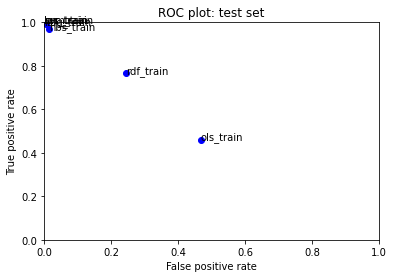

In [21]:
fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train, rdf_performance_train]


for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ordinary Least Squares (OLS) Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [22]:
ols_predictions = ols.predict(X_train)

### let's look at some false positives:

In [23]:
# false positives

print("Examples of false positives:")

import random, time

for i in range(0, len(ols_predictions)):
    if (ols_predictions[i] == 1):
        if (X_raw_train.iloc[i]['sentiment'] == 0):
            if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
                print(i)
                print(X_raw_train.iloc[i]['review'])
                print('* * * * * * * * * ')


Examples of false positives:
16
I am a relative latecomer to the transcendent work of film auteur Yasujiro Ozu, whose masterfully understated views of Japanese life, especially in the post-WWII era, illuminate universal truths. Having now seen several of his landmark films such as 1949's \Late Spring\" and 1953's \"Tokyo Story\", I am convinced that Ozu had a particularly idiosyncratic gift of conveying the range of feelings arising from intergenerational conflict through elliptical narratives and subtle imagery. It is Taiwanese director Hou Hsiao-hsien's keen aspiration to pay homage to Ozu on his centenary with this generally enervating 2003 film. Among with co-screenwriter T'ien-wen Chu, Hsiao-hsien appears to get the visuals right but does not capture the requisite emotional weight that would have made the glacial pacing tolerable.<br /><br />The story concerns Yôko, a young Japanese writer researching the life of mid-20th century Taiwanese composer Jiang Wen-Ye in Tokyo after comi

3076
Linda Lovelace was the victim of a sadistic woman hater, Chuck Traynor. I don't understand how having sex with a dog (which is animal abuse, as well) can be found to be entertaining or funny. Linda Lovelace was a virtual prisoner who was coerced into making these films. I know some people will criticize this comment but I feel strongly that these types of films fuel the fire of hatred and further misogynistic feelings towards women. This society continues to portray women as sexual objects as opposed to human beings. We call ourselves \civilized\" however I feel we have a long way to go before we can ever scratch the surface of being civilized."
* * * * * * * * * 
3217
Leonard Maltin compared this film to a Mel Brooks comedy. He was far too kind to Ms. Rivers, and far too cruel to Mr. Brooks. Not even the raunchiest Mel Brooks films are this tasteless, and at least they're genuinely funny. This picture deserves a place on the hundred-worst list.
* * * * * * * * * 
3219
A family wi

6972
If you're the kind of movie-goer who enjoys original content and intelligent suspense...then look elsewhere, kids, cause Sleepwalkers really sucks. Usually I'm more eloquent than that, but...wow...this was bad. I especially love it when Charles offers Tanya a ride home, she declines, and then he is seen WALKING HOME. Where's his car?? Anyway, just don't see it, folks. I really want to be more specific, but words escape me. Cats jumping on people. A guy getting stabbed by corn. Cheesey lines up the proverbial \wazoo\". Just don't see it. Wait, I take that back! See it for writer Stephen King's cameo as the guy who owns the graveyard. He's actually pretty good. Even with guest appearances by Mark Hamill and Ron Perlman, King gives the best performance of the film. But, other than that...wow...BAD."
* * * * * * * * * 
7004
I question its importance to Queer Cinema as it seems to be more about having a homosexual encounter via violent behavior than making any clear statements regardin

10701
This movie is a horrible distortion of lies and exaggerations that were put together by the most shameless lunatics to ever work on a TV movie. The story is wrong and a complete lie. There is nothing in this movie that accurately portrays Senator McCarthy. It's just a horrible scam and it amazes me that anyone associated with this production ever got another job in the industry. The marxist-leninists who wrote this trash did so in order to attack a man who has been vindicated by history and their fear that anyone would dare to destroy communism. Unfortunately for these communist nut jobs, Ronald Reagan took over where McCarthy left off and they couldn't stop him, thus the end of the Soviet Union and its' cohorts.<br /><br />Never, ever watch this film if you're looking for truth regarding Sen. McCarthy. Read Ann Coulter's book, \Treason\" for a better look at the truth about Sen. McCarthy.<br /><br />It will also help if you read about what really happened to Senator McCarthy by 

14007
With all the excessive violence in this film, it could've been NC-17. But the gore could've been pg-13 and there were quite a lot of swears when the mum had the original jackass bad-hairdewed boy friend. There was a lot of character development which made the film better to watch, then after the kid came back to life as the scarecrow, there was a mindless hour and ten minutes of him killing people. The violence was overly excessive and i think the bodycount was higher than twelve which is a large number for movies like this. ALmost every character in the film is stabbed or gets their head chopped off, but the teacher who called him \white trash\" and \"hoodlum\" (though the character lester is anything but a hoodlum, not even close, i know hoods and am part hood, they don't draw in class, they sit there and throw stuff at the teacher). The teacher deserved a more gruesome death than anyone of the characters, but was just stabbed in the back. There were two suspenseful scenes in t

17740
I will warn you here: I chose to believe those reviewers who said that this wasn't an action film in the usual sense, rather a psychological drama so you should appreciate it on that basis and you will be alright.<br /><br />I am here to tell you that they were wrong. Completely wrong.<br /><br />Well, no, not completely; it is very disappointing if you are looking for an action flick, they were right about that. But it is also very unsatisfying on all other levels as well.<br /><br />Tom Beringer wasn't too bad, I suppose, no worse than usual; but what possessed them to cast Billy Zane in this? Was it some sort of death wish on the part of the producers? A way to made their film a guaranteed flop? In that case, it worked.<br /><br />If they were actually aiming for success, then why not cast somebody who can act? Oh, and might as well go for a screenwriter who knows how to write. Ah, yes, and a director who knows how to direct.<br /><br />As someone who sat through this mess, ac

---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: ordinary least squares

In [24]:
ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
ols_performance_test.compute_measures()
print(ols_performance_test.performance_measures)

{'Pos': 2501, 'Neg': 2499, 'TP': 1144, 'TN': 1353, 'FP': 1146, 'FN': 1357, 'Accuracy': 0.4994, 'Precision': 0.4995633187772926, 'Recall': 0.45741703318672533, 'desc': 'ols_test'}


### MODEL: SVM, linear

In [25]:
svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
svm_performance_test.compute_measures()
print(svm_performance_test.performance_measures)

{'Pos': 2501, 'Neg': 2499, 'TP': 2099, 'TN': 2044, 'FP': 455, 'FN': 402, 'Accuracy': 0.8286, 'Precision': 0.8218480814408771, 'Recall': 0.8392642942822871, 'desc': 'svm_test'}


### MODEL: logistic regression

In [26]:
lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print(lgs_performance_test.performance_measures)

{'Pos': 2501, 'Neg': 2499, 'TP': 2091, 'TN': 2071, 'FP': 428, 'FN': 410, 'Accuracy': 0.8324, 'Precision': 0.8300913060738389, 'Recall': 0.8360655737704918, 'desc': 'lgs_test'}


### MODEL: Naive Bayes

In [27]:
nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
nbs_performance_test.compute_measures()
print(nbs_performance_test.performance_measures)

{'Pos': 2501, 'Neg': 2499, 'TP': 1880, 'TN': 1882, 'FP': 617, 'FN': 621, 'Accuracy': 0.7524, 'Precision': 0.7529034841810173, 'Recall': 0.7516993202718912, 'desc': 'nbs_test'}


### MODEL: Perceptron

In [28]:
prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test')
prc_performance_test.compute_measures()
print(prc_performance_test.performance_measures)

{'Pos': 2501, 'Neg': 2499, 'TP': 2076, 'TN': 2057, 'FP': 442, 'FN': 425, 'Accuracy': 0.8266, 'Precision': 0.8244638602065131, 'Recall': 0.8300679728108756, 'desc': 'prc_test'}


### MODEL: Ridge Regression Classifier

In [29]:
rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test')
rdg_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

{'Pos': 2501, 'Neg': 2499, 'TP': 2246, 'TN': 2141, 'FP': 358, 'FN': 255, 'Accuracy': 0.8774, 'Precision': 0.8625192012288786, 'Recall': 0.8980407836865254, 'desc': 'rdg_test'}


### MODEL: Random Forest Classifier

In [30]:
rdf_performance_test = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test')
rdf_performance_test.compute_measures()
print(rdf_performance_test.performance_measures)

{'Pos': 2501, 'Neg': 2499, 'TP': 1912, 'TN': 1872, 'FP': 627, 'FN': 589, 'Accuracy': 0.7568, 'Precision': 0.753052382827885, 'Recall': 0.7644942023190724, 'desc': 'rdf_test'}


### ROC plot to compare performance of various models and fits

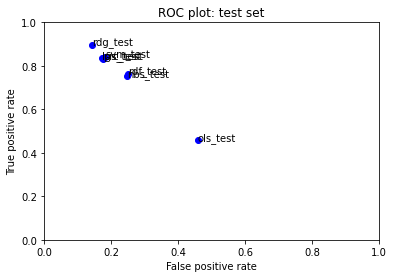

In [31]:
fits = [ols_performance_test, svm_performance_test, lgs_performance_test, nbs_performance_test, prc_performance_test, rdg_performance_test, rdf_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

---

# <span style="color:red">SUBMISSION</span>

---

In [32]:
# read in test data for submission
# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
raw_data, X_test_submission = process_raw_data(fn='moviereviews_train.tsv', my_random_seed=21, test=True)
print("Number of rows in the submission test set (should be 25,000): ")

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
Shape of HashingVectorizer X:
(25000, 262144)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9
5          89           5
6         112           9
7 

---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [39]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = rdg.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

0.50332


In [40]:
raw_data.head()

,id,sentiment,review,word_count,punc_count
0,5814_8,1,With all this stuff going down at the moment w...,433,20
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",158,16
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,378,20
3,3630_4,0,It must be assumed that those who praised this...,379,8
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,367,9


In [41]:
my_submission.head()

,id,prediction
0,5814_8,1
1,2381_9,1
2,7759_3,0
3,3630_4,0
4,9495_8,0


In [42]:
my_submission.shape

(25000, 2)

In [43]:
# export submission file as pdf
# CHANGE FILE PATH: 
my_submission.to_csv('moviereviews_submission.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation